In [869]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [870]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,What
0,entailment,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,...,0,0,0,0,0,0,2,2,6,0.505262
1,entailment,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,...,0,0,0,0,4,0,0,1,7,0.944161
2,contradiction,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,...,0,0,0,0,1,0,0,0,0,0.360803
3,contradiction,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,...,0,0,0,0,2,0,0,0,2,0.358316
4,neutral,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,...,2,0,1,0,2,0,0,0,1,0.224679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,...,0,0,0,0,1,0,0,2,2,0.570392
96,entailment,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,...,0,0,0,0,3,0,0,1,0,0.830284
97,contradiction,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,...,0,0,0,0,0,0,0,0,2,0.086890
98,contradiction,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,...,0,0,0,0,2,0,0,0,0,0.357685


In [871]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf,What
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.000084,1.966909,3.329762,0.714661,4.027800,1.670292,0.708723,0.286763,3.231024,0.323173,...,0.35000,0.160000,0.270000,0.090000,2.070000,0.030000,0.380000,0.330000,2.120000,0.496864
std,13.066107,3.663051,3.705304,1.865683,5.916808,3.708663,1.476073,1.224743,3.755477,0.811359,...,1.14922,0.677488,1.052702,0.668105,1.465116,0.171447,0.599326,0.667499,2.621897,0.327958
min,0.916115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011613
25%,9.314418,0.000000,0.325808,0.000000,0.000000,0.000000,0.000000,0.000000,1.096962,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.216580
50%,14.530209,0.000000,2.048562,0.000000,2.046613,0.000000,0.000000,0.000000,2.370600,0.000000,...,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.456016
75%,22.358584,2.639672,5.007361,0.000000,5.493229,0.862745,0.984578,0.000000,3.736365,0.000000,...,0.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,3.000000,0.807519
max,72.258189,19.695068,19.075915,8.491863,35.697347,20.094136,8.336549,9.572460,20.975957,5.915599,...,7.00000,5.000000,9.000000,6.000000,6.000000,1.000000,2.000000,3.000000,13.000000,1.000000


In [872]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


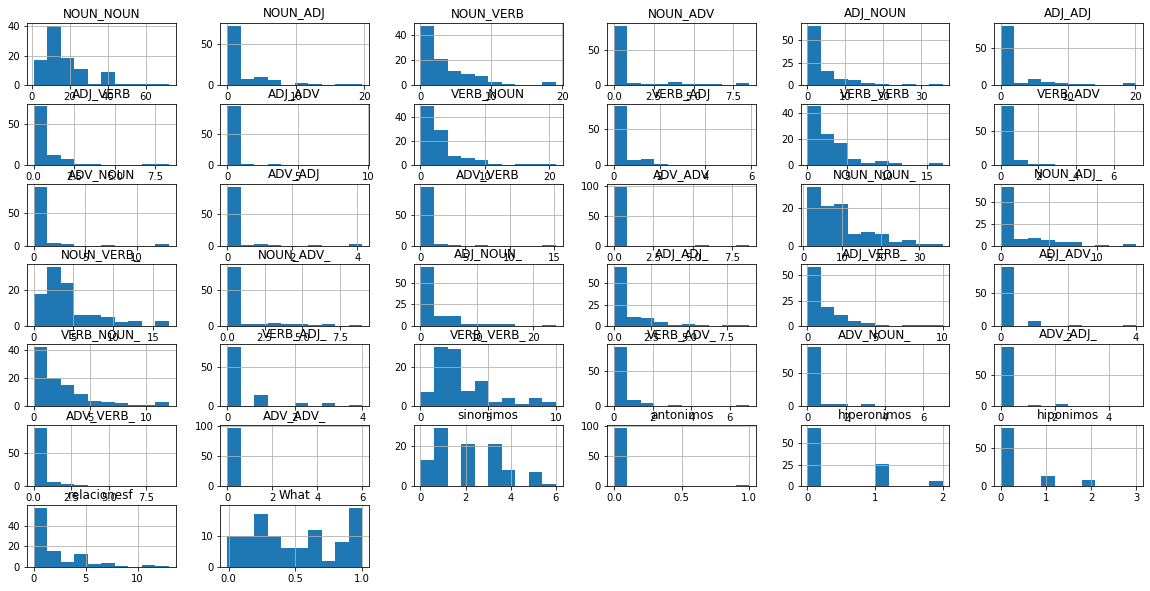

In [873]:
dataframe.hist(figsize=(20,10))
plt.show()

In [874]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [875]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [876]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_64827/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_64827/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 38)

In [877]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [878]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [879]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [880]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [881]:
model.decision_function(X)

array([[-1.17576428e-01,  2.04182330e-01, -8.66059022e-02],
       [-1.30230099e+00,  1.23656819e+00,  6.57328036e-02],
       [ 2.81676743e-01,  2.02281935e-01, -4.83958678e-01],
       [ 2.85557262e-01,  1.54925027e-02, -3.01049765e-01],
       [-1.93516160e-01,  5.41199817e-02,  1.39396178e-01],
       [ 3.95888325e-01, -4.42250923e-01,  4.63625976e-02],
       [-1.08432700e+00,  1.65241348e+00, -5.68086487e-01],
       [-3.75227258e-01,  1.02711283e+00, -6.51885567e-01],
       [ 5.16360175e-01, -8.15518290e-01,  2.99158115e-01],
       [-7.61399327e-01,  1.48718424e+00, -7.25784910e-01],
       [-2.42503847e+00,  7.40360282e-01,  1.68467818e+00],
       [ 3.69476781e-01, -1.47027313e-01, -2.22449468e-01],
       [-6.04724872e-01,  6.60550408e-01, -5.58255363e-02],
       [ 1.30575839e+00,  2.89203850e-01, -1.59496224e+00],
       [-1.51445032e+00, -7.84934095e-02,  1.59294373e+00],
       [-1.19429713e-01,  2.27781556e-01, -1.08351843e-01],
       [-2.37372728e+00,  2.28678486e+00

In [882]:
labels=dataframe.columns[1:]

In [883]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [884]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [885]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  24 VERB_NOUN_ 32 sinonimos
Entailment  37 What 21 ADJ_ADJ_
Neutral  30 ADV_VERB_ 37 What


In [886]:
n_columns=dataframe.shape[1]-1

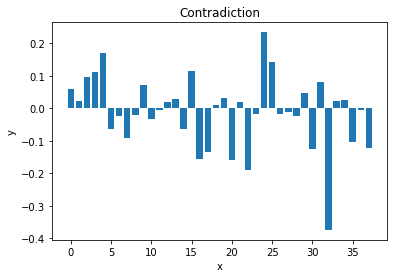

In [887]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

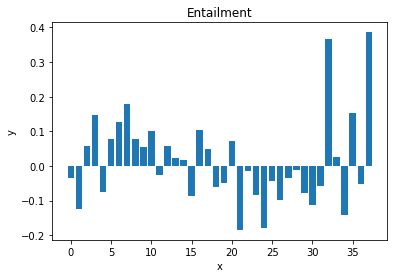

In [888]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

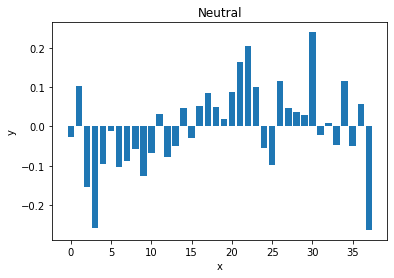

In [889]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [890]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'contradiction' 'contradiction' 'neutral'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'contradiction' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'contradiction' 'contradiction' 'contradiction' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'neutral' 'neutral'
 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'entailment' 'contradiction' 'contradiction'
 'contradiction' 'neutral' 'neutral' 'entailment' 'e

In [891]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [892]:
X

array([[28.64509261,  1.63195105,  9.03256369, ...,  2.        ,
         6.        ,  0.50526154],
       [26.67130001,  3.98422295,  4.43769664, ...,  1.        ,
         7.        ,  0.9441607 ],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         0.        ,  0.36080334],
       ...,
       [ 6.67214802,  0.        ,  5.13886273, ...,  0.        ,
         2.        ,  0.08689009],
       [ 7.11044979,  0.        ,  0.6588807 , ...,  0.        ,
         0.        ,  0.35768539],
       [13.31903434,  0.        ,  0.19219354, ...,  0.        ,
         2.        ,  0.03010956]])

In [893]:
model.score(X,y)

0.77

In [894]:
print(confusion_matrix(y, predictions))

[[18  4  5]
 [ 3 37  2]
 [ 4  5 22]]


In [895]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [896]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Logistic Regression: 0.412500 (0.198037)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [897]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.75


In [898]:
print(confusion_matrix(Y_validation, predictions))

[[2 0 1]
 [0 8 2]
 [1 1 5]]


In [899]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.67      0.67      0.67         3
   entailment       0.89      0.80      0.84        10
      neutral       0.62      0.71      0.67         7

     accuracy                           0.75        20
    macro avg       0.73      0.73      0.73        20
 weighted avg       0.76      0.75      0.75        20



In [900]:
#X_new = pd.DataFrame()
#model.predict(X_new)